# Introduction to Data Science – Homework 5 (February 24, 2023)
*COMP 5360 / MATH 4100, University of Utah, http://datasciencecourse.net/*

Due: Friday, February 24, 11:59pm.

In this homework you will use linear regression to study house prices in Salt Lake City.

## Your Data
Fill out the following information: 

*First Name:*   Lucia

*Last Name:*   Ranallo

*E-mail:*    u1427138@umail.utah.edu

*UID:*  u1427138


## Regression of real estate data
For this problem, you will analyze SLC real estate data. The dataset contains multiple listing service (MLS) real estate transactions for houses sold in 2015-16 in zip code 84103 ([SLC avenues neighborhood](https://www.google.com/maps/place/Salt+Lake+City,+UT+84103/@40.8030372,-111.8957957,12z/data=!3m1!4b1!4m5!3m4!1s0x87525f672006dded:0x311e638d9a1a2de5!8m2!3d40.810506!4d-111.8449346)). We are primarily interested in regressing the `SoldPrice` on the house attributes (`property size`, `house size`, `number of bedrooms`, etc...). 


### Task 1: Import the data 
Use the [`pandas.read_csv()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) function to import the dataset. The data is contained in two files located in the same directory as this notebook: [`train1.csv`](train1.csv) and [`train2.csv`](train2.csv). After you import these files separately, concatenate them into one big dataframe. This pandas dataframe will be used for data exploration and linear regression. 

In [1]:
# imports and setup 
import pandas as pd
import scipy as sc
import numpy as np

import statsmodels.formula.api as sm

#%matplotlib notebook
import matplotlib.pyplot as plt 
plt.style.use('ggplot')
%matplotlib inline  
plt.rcParams['figure.figsize'] = (10, 6) 

In [2]:
# your code goes here

# read in the two data frames
train1 = pd.read_csv("train1.csv")
train2 = pd.read_csv("train2.csv")

# concatenate them into one big dataframe
data = pd.concat([train1,train2])
# list all the column names and sort through what's important
data.columns.values

array(['ListNo', 'Access', 'AdditInfo', 'Acres', 'ListAgt', 'AirType',
       'Amenities', 'Area', 'BackDim', 'Basemnt', 'BsmntFin', 'City',
       'ListCoAgt', 'CompBac', 'CompDays', 'CompSac', 'ContPh1',
       'ContPh2', 'Contact', 'ContractDt', 'County', 'CrprtCap', 'DVR',
       'DaysOnMkt', 'Deck', 'DirPre', 'DirPost', 'EWCoord', 'EntrdBy',
       'EntryDt', 'Excl', 'ExpDtDisp', 'Ext', 'FeatExt', 'FeatInt',
       'Floor', 'Frontage', 'GaragCap', 'Garage', 'HOAFee', 'HOATerms',
       'Heat', 'HouseNbr', 'Image', 'Incl', 'Irregular', 'LandScape',
       'Latitude', 'ListDt', 'ListType', 'Longitude', 'Lot', 'LstPrice',
       'NSCoord', 'NumDish', 'NumDispose', 'NumOvRng', 'NumRefg',
       'OffMktDt', 'ListOff', 'OpenHseDt', 'Owner', 'P1Bed', 'P1BthFull',
       'P1BthHalf', 'P1BthTq', 'P1Fire', 'P1Rent', 'P1Sqf', 'P1FamDen',
       'P1Kitch', 'P1Bar', 'P1Formal', 'P1SemiForm', 'P1Laundry', 'P2Bed',
       'P2BthFull', 'P2BthHalf', 'P2BthTq', 'P2Fire', 'P2Rent', 'P2Sqf',
       '

### Task 2: Clean the data 

1. There are 206 different variables associated with each of the 348 houses in this dataset. Skim them and try to get a rough understanding of what information this dataset contains. If you've never seen a real estate listing before, you might take a look at one on [this](http://www.utahrealestate.com/) website to get a better sense of the meanings of the column headers in the dataset.  

+ Only keep houses with List Price between 300,000 and 900,000 dollars both inclusive. This is an arbitrary choice and we realize that some people are high rollers, but for our purposes we'll consider the others as outliers. 

+ Remove columns that you don't think contribute to the value of the house. This is a personal decision – what attributes of a house are important to you? 
You should at least keep the following variables since questions below will use them: `['Acres', 'Deck', 'GaragCap', 'Latitude', 'Longitude','EWCoord', 'DaysOnMkt', 'LstPrice', 'Patio', 'PkgSpacs', 'PropType', 'SoldPrice', 'Taxes', 'TotBed', 'TotBth', 'TotSqf', 'YearBlt']` 

+ Check the datatypes and convert any numbers that were read as strings to numerical values. (Hint: You can use [`str.replace()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.str.replace.html) to work with strings.) If there are any categorical values you're interested in, then you should convert them to numerical values as in Lecture. In particular, convert 'TotSqf' to an integer and add a column titled `Prop_Type_num` that is 
$$
\text{Prop_Type_num}_i = \begin{cases} 
1 & \text{if $i$-th listing is a condo or townhouse} \\
0 & \text{if $i$-th listing is a single family house}
\end{cases}. 
$$
+ Remove the listings with erroneous `Longitude` (one has Longitude = 0) and `Taxes` values (two have unreasonably large values).

In [62]:
# your code goes here

# filter the data to only include list prices between 300000 and 900000, including those values
data = data[(data["LstPrice"] >= 300000) & (data["LstPrice"] <= 900000)]

# select the columns of the variables we want to include
data_clean = data[['Acres', 'Deck', 'GaragCap', 'Latitude', 'Longitude','EWCoord', 'DaysOnMkt', 'LstPrice', 'Patio', 'PkgSpacs', 'PropType', 'SchDist', 'SoldPrice', 'Taxes', 'TotBed', 'TotBth', 'TotSqf', 'YearBlt', 'LastMod']]
print(data_clean.head())
# list the data types to know if any need to be changed
data_clean.dtypes

# map the property type to the either 1 or 0 depending on the map listed above
data_clean["Prop_Type_num"] = data_clean["PropType"].map({'Condo':1, 'Townhouse':1, 'Single Family':0})
data_clean.tail()

# remove the commas and conver total sqf to an integer
data_clean["TotSqf"] = data_clean["TotSqf"].str.replace(',','')
data_clean = data_clean.astype({"TotSqf":int})

# sort the values by latitude to find the one with a value of 0
data_sort = data_clean.sort_values(by="Longitude",ascending = False)
# the value with a value of 0 is at index 66

# sort the values by Taxes to find the outliers
data_sort = data_clean.sort_values(by="Taxes",ascending=False)
# the values with the outlying values are 34 and 91

# create the final dataset removing the corresponding rows with high taxes or a longitude of 0
data_final = data_clean.drop([66,34,91])
data_final

   Acres  Deck  GaragCap   Latitude   Longitude  EWCoord  DaysOnMkt  LstPrice  \
0   0.29     1         3  40.779524 -111.893542        0        7.0    725000   
2   0.11     0         0  40.773972 -111.867470        0        4.0    390000   
3   0.14     0         1  40.783009 -111.872100      579       12.0    445000   
5   0.01     0         2  40.771693 -111.886951      123       12.0    339000   
6   0.14     1         2  40.783889 -111.872194      580        NaN    600000   

   Patio  PkgSpacs       PropType    SchDist  SoldPrice  Taxes  TotBed  \
0      1         0  Single Family  Salt Lake     752000   7244     4.0   
2      1         0  Single Family  Salt Lake     390000   1816     3.0   
3      1         3  Single Family  Salt Lake     443000   3260     3.0   
5      0         2          Condo  Salt Lake     334000   2141     3.0   
6      1         2  Single Family  Salt Lake     570000   4197     3.0   

   TotBth TotSqf  YearBlt     LastMod  
0     5.0   5415     1998  0

/var/folders/fp/mr0bdnzj09vb9z68d9kw00m40000gn/T/ipykernel_43342/2572926561.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean["Prop_Type_num"] = data_clean["PropType"].map({'Condo':1, 'Townhouse':1, 'Single Family':0})
/var/folders/fp/mr0bdnzj09vb9z68d9kw00m40000gn/T/ipykernel_43342/2572926561.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean["TotSqf"] = data_clean["TotSqf"].str.replace(',','')


,Acres,Deck,GaragCap,Latitude,Longitude,EWCoord,DaysOnMkt,LstPrice,Patio,PkgSpacs,PropType,SchDist,SoldPrice,Taxes,TotBed,TotBth,TotSqf,YearBlt,LastMod,Prop_Type_num
0,0.29,1,3,40.779524,-111.893542,0,7.0,725000,1,0,Single Family,Salt Lake,752000,7244,4.0,5.0,5415,1998,08/29/2016,0
2,0.11,0,0,40.773972,-111.867470,0,4.0,390000,1,0,Single Family,Salt Lake,390000,1816,3.0,1.0,1702,1940,08/29/2016,0
3,0.14,0,1,40.783009,-111.872100,579,12.0,445000,1,3,Single Family,Salt Lake,443000,3260,3.0,2.0,1756,1940,08/29/2016,0
5,0.01,0,2,40.771693,-111.886951,123,12.0,339000,0,2,Condo,Salt Lake,334000,2141,3.0,2.0,1368,1976,08/01/2016,1
6,0.14,1,2,40.783889,-111.872194,580,NaN,600000,1,2,Single Family,Salt Lake,570000,4197,3.0,3.0,2956,1950,07/29/2016,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,0.12,1,1,40.771219,-111.856599,1100,185.0,533800,0,0,Single Family,Salt Lake,529000,3928,3.0,3.0,3017,1898,10/28/2015,0
142,0.15,1,2,40.779253,-111.893385,0,203.0,549000,0,4,Townhouse,Salt Lake,535000,3870,5.0,4.0,3494,1998,09/23/2015,1
144,0.01,0,2,40.770904,-111.886201,131,198.0,349999,2,2,Condo,Salt Lake,340000,1877,2.0,2.0,1473,1979,05/24/2016,1
146,0.07,0,1,40.772835,-111.854867,1157,375.0,330000,0,0,Single Family,Salt Lake,310000,2079,5.0,3.0,2094,1886,09/11/2015,0


### Task 3: Exploratory data analysis 

1. Explore the dataset. Write a short description of the dataset describing the number of items, the number of variables and check to see if the values are reasonable. 

+ Make a bar chart showing the breakdown of the different types of houses (single family, townhouse, condo). 

+ Compute the correlation matrix and use a heat map to visualize the correlation coefficients. 
    - Use a diverging color scale from -1 to +1 (see `vmin` and `vmax` parameters for [pcolor](https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.pcolor.html))
    - Show a legend
    - Make sure the proper labels are visible and readable (see [`xticks`](https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.xticks.html) and the corresponding [`yticks`](https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.yticks.html).

+ Make a scatter plot matrix to visualize the correlations. Color-code the dots by property type. For the plot, only use a subset of the columns: `['Acres', 'LstPrice', 'PkgSpacs', 'Patio', 'SoldPrice', 'Taxes', 'TotBed', 'TotBth', 'TotSqf', 'YearBlt' ]`. Determine which columns have strong correlations. 

+ Describing your findings. 


In [90]:
# your code goes here

# print the dimensions of the data
print(data_final.shape)

# print the summary statistics of the data
data_final.describe()

(185, 22)


,Acres,Deck,GaragCap,Latitude,Longitude,EWCoord,DaysOnMkt,LstPrice,Patio,PkgSpacs,SoldPrice,Taxes,TotBed,TotBth,TotSqf,YearBlt,Prop_Type_num,DiffPriceAbsolute,DiffPriceRelative
count,185.000000,185.00000,185.00000,185.000000,185.000000,185.000000,178.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000
mean,0.148811,0.72973,1.40000,40.778261,-111.874250,573.313514,54.106742,507338.183784,0.708108,1.118919,493949.945946,3271.329730,3.497297,2.729730,2727.881081,1938.913514,0.151351,-13388.237838,0.975665
std,0.116426,0.85493,0.95667,0.005786,0.013389,386.009390,76.473214,157873.689513,0.700302,1.617472,150973.249054,1474.230479,1.123486,0.945488,1017.921826,36.570555,0.359364,21015.069096,0.038156
min,0.000000,0.00000,0.00000,40.769424,-111.900068,0.000000,1.000000,300000.000000,0.000000,0.000000,298000.000000,1100.000000,2.000000,1.000000,1082.000000,1852.000000,0.000000,-114900.000000,0.744610
25%,0.080000,0.00000,1.00000,40.772842,-111.884505,221.000000,7.000000,385000.000000,0.000000,0.000000,375000.000000,2207.000000,3.000000,2.000000,1963.000000,1907.000000,0.000000,-19500.000000,0.961538
50%,0.120000,1.00000,2.00000,40.777951,-111.872999,555.000000,25.000000,459500.000000,1.000000,0.000000,451000.000000,2904.000000,3.000000,3.000000,2548.000000,1936.000000,0.000000,-10000.000000,0.979325
75%,0.180000,1.00000,2.00000,40.782477,-111.865673,800.000000,72.750000,600000.000000,1.000000,2.000000,590000.000000,4034.000000,4.000000,3.000000,3242.000000,1975.000000,0.000000,0.000000,1.000000
max,0.650000,5.00000,5.00000,40.791059,-111.843083,1661.000000,485.000000,899000.000000,3.000000,8.000000,860000.000000,7481.000000,8.000000,6.000000,6447.000000,2015.000000,1.000000,37100.000000,1.073140


**Your Interpretation:** We can see that there are 20 different variables in this dataset and 185 rows. We can see that the the only variable with missing values is "DaysOnMkt." We can also see from the summary statistics that the values inclulded in the dataset are seemingly reasonable. 

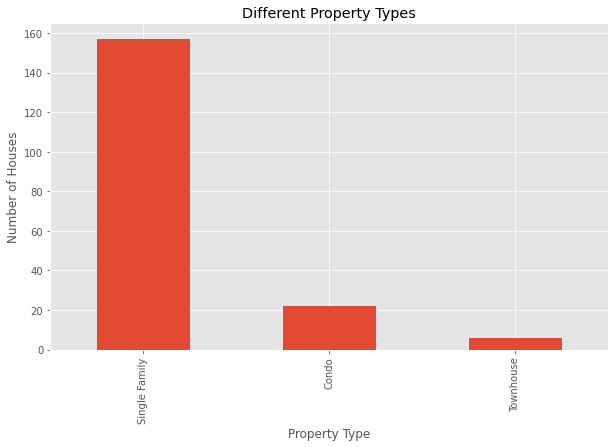

In [5]:
# bar chart

# plot the bar chart
data_final["PropType"].value_counts().plot(kind="bar",title="Different Property Types")
# label the axes
plt.xlabel("Property Type")
plt.ylabel("Number of Houses")
plt.show()


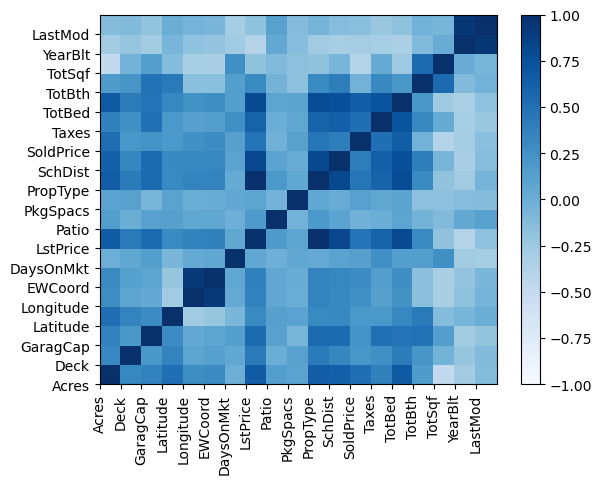

In [93]:
# correlation matrix

# calculate the correlation matrix
corr_matrix = data_final.corr()

# use the code from a previous lecture
plt.style.use('default')
# select a blue color map
heatmap = plt.pcolor(corr_matrix, cmap=plt.cm.Blues,vmin=-1,vmax=1)
# plot the legend on the side
plt.colorbar(heatmap)
# label the x and y axes/ticks
plt.xticks(np.arange(0,19),labels=['Acres', 'Deck', 'GaragCap', 'Latitude', 'Longitude','EWCoord', 'DaysOnMkt', 'LstPrice', 'Patio', 'PkgSpacs', 'PropType', 'SchDist', 'SoldPrice', 'Taxes', 'TotBed', 'TotBth', 'TotSqf', 'YearBlt', 'LastMod'],rotation=90)
plt.yticks(np.arange(0,19),labels=['Acres', 'Deck', 'GaragCap', 'Latitude', 'Longitude','EWCoord', 'DaysOnMkt', 'LstPrice', 'Patio', 'PkgSpacs', 'PropType', 'SchDist', 'SoldPrice', 'Taxes', 'TotBed', 'TotBth', 'TotSqf', 'YearBlt', 'LastMod'])
plt.show()

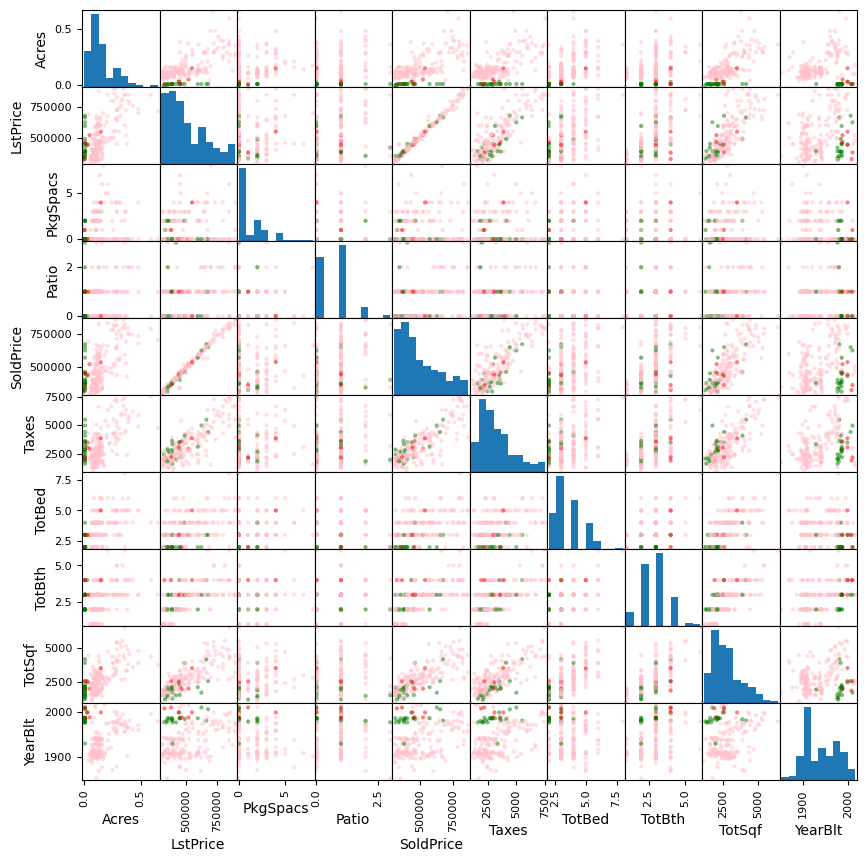

In [94]:
# scatterplot matrix
from pandas.plotting import scatter_matrix

# subset the data to only include the columns we want
data_subset = data_final[['Acres', 'LstPrice', 'PkgSpacs', 'Patio', 'SoldPrice', 'Taxes', 'TotBed', 'TotBth', 'TotSqf', 'YearBlt']]

# create a color list mapping the property type to the corresponding color
color_list=data_final["PropType"].map({"Condo":"green", "Townhouse":"red", "Single Family":"pink"})

# create the scatter matrix using the subsetted data and the color list we created above
scatter_matrix(data_subset, c=color_list, figsize=(10,10))
print()

**Your Interpretation:** From this matrix we can see that the strongest correlations appear between List Price and Sold Price, as well as Taxes and either List Price or Sold Price. We can see a general positive correlation between Acres and List price as well as Acres and Year Built. We see a positive correlation again between Acres and Taxes. We can see more positive correlations between Total Square footage and Acres, List Price, Sold Price, and taxes. These are all correlations that we would expect to see

### Task 4: Geospatial plot
Two of the variables are the latitude and longitude of each listing. Salt Lake City is on this nice east-west, north south grid, so even a simple plot of lat and long makes sense. Create a scatterplot of these two variables. Use color to indicate the price of the house. How does the price depend on the house location?

What can you say about the relation between the location and the house price?
 

In [10]:
# your code goes here.

# import the altair library
import altair as alt

# create a scatterplot using Longitude as y and Latitude as x and Sold Price as color
alt.Chart(data_final).mark_circle().encode(alt.X('Latitude', scale = alt.Scale(zero = False)),
  alt.Y('Longitude', scale = alt.Scale(zero = False))
,color='SoldPrice')

alt.Chart(...)

**Your Interpretation:** From this graph we can see that in general most of the more expensive houses tend to be a little more northern and eastern while the south west corner contains houses that are priced lower. From this graph it would be difficult to make conclusions about how the location affects the house price because there are a variety of points within each sector. 

### Task 5: Simple  Linear Regression 
Use the `ols` function from the [statsmodels](http://www.statsmodels.org/stable/index.html) package to regress the Sold price on some of the other variables. Your model should be of the form:
$$
\text{Sold Price} = \beta_0 + \beta_1 x, 
$$
where $x$ is one of the other variables. 

You'll find that the best predictor of sold price is the list price. Report the R-squared value for this model (`SoldPrice ~ LstPrice`) and give an interpretation for its meaning. Also give an interpretation of $\beta_1$ for this model. Make a scatterplot of list price vs. sold price and overlay the prediction coming from your regression model. 

In [97]:
# Your code here

# test the regression on Taxes
data_ols = sm.ols(formula="SoldPrice ~ Taxes", data=data_final).fit()
data_ols.summary()

# test the regression on Acres
data_ols = sm.ols(formula="SoldPrice ~ Acres", data=data_final).fit()
data_ols.summary()

# test the regression on Square footage
data_ols = sm.ols(formula="SoldPrice ~ TotSqf", data=data_final).fit()
data_ols.summary()

# calculate the regression using List price
data_ols = sm.ols(formula="SoldPrice ~ LstPrice", data=data_final).fit()
data_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SoldPrice   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                 1.093e+04
Date:                Fri, 24 Feb 2023   Prob (F-statistic):          3.84e-165
Time:                        15:13:14   Log-Likelihood:                -2088.2
No. Observations:                 185   AIC:                             4180.
Df Residuals:                     183   BIC:                             4187.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    1.28e+04   4818.171      2.656      0.009    3290.675    2.23e+04
LstPrice       0.9484      0.009    104.560      0.000       0.930       0.966
==============================================================================
Omnibus:                       98.323   Durbin-Watson:                   1.896
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              709.027
Skew:                          -1.864   Prob(JB):                    1.09e-154
Kurtosis:                      11.837   Cond. No.                     1.79e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.79e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Your Interpretation:** From this model we can see that the R squared value is 0.984, which is a very high value. This means that 98.4% of the variation in the data can be explained by this model, showing it is very accurate. We can see that the $\beta_1$ value of this model is 0.9484, which means that for every 1 dollar increase in the list price, the sold price will increase by $0.984.

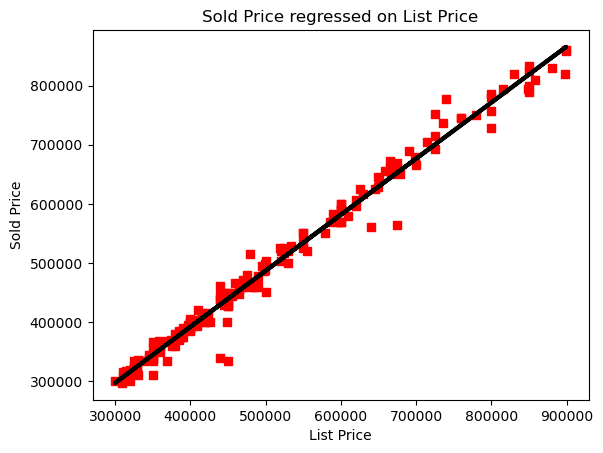

In [98]:
# scatter plot

# plot the original data
plt.scatter(x=data_final['LstPrice'],y=data_final['SoldPrice'],c='r',marker='s')
# plot the predicted model
plt.plot(data_final['LstPrice'],data_ols.predict(),c='black',linewidth=3)
plt.xlabel("List Price")
plt.ylabel("Sold Price")
plt.title("Sold Price regressed on List Price")
plt.show()


### Task 6: Multilinear Regression 
Develop a multilinear regression model for house prices in this neighborhood. We could use this to come up with a list price for houses coming on the market, so do not include the list price in your model and, for now, ignore the categorical variable Prop_Type. Your model should be of the form:
$$
\text{Sold Price} = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \cdots +  \beta_n x_n, 
$$
where $x_i$ are predictive variables.


**Question 1**: If we wanted to start a 'house flipping' company, we'd have to be able to do a better job of predicting the sold price than the list price does. How does your model compare? 

Next look at the difference between list price and sold price explicitly. Calculate two new columns for your dataset. `DiffPriceAbsolute` and `DiffPriceRelative`.

* `DiffPriceAbsolute` - This is difference between sold price and list price. If it is positive, that means the house sold for more than it was listed at.
* `DiffPriceRelative` - This is the relative difference between sold price and list price. A value of 1.1 here means that the house sold for 110% of the asking price, and 0.9 means the house sold for 90% of the asking price.

Now, create two new models. One to predict `DiffPriceAbsolute`, and one to predict `DiffPriceRelative`. Use the same predictive variables as i the last model.


**Question 2**: Which of these two new models makes better predictions.

**Question 3**: Based on your answer to question two, why are these models different/the same.

To help justify your answer to question 3, train two models to predict `DiffPriceAbsolute` and `DiffPriceRelative` based on just `SoldPrice`. In addition, for each model make a scatterplots similar to Task 5 for these models.

In [99]:
# your code goes here

# create a model using variables that are significant and increaset the r-squared value with each addition
data_ols = sm.ols(formula="SoldPrice ~ Taxes + Acres + Patio + TotSqf", data=data_final).fit()
data_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SoldPrice   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     132.8
Date:                Fri, 24 Feb 2023   Prob (F-statistic):           1.36e-52
Time:                        15:13:20   Log-Likelihood:                -2341.0
No. Observations:                 185   AIC:                             4692.
Df Residuals:                     180   BIC:                             4708.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.616e+05   1.76e+04      9.187      0.000    1.27e+05    1.96e+05
Taxes         49.5149      6.036      8.203      0.000      37.604      61.426
Acres       1.557e+05   6.79e+04      2.292      0.023    2.17e+04     2.9e+05
Patio       2.129e+04   8177.922      2.603      0.010    5151.443    3.74e+04
TotSqf        48.4463      9.306      5.206      0.000      30.084      66.808
==============================================================================
Omnibus:                       27.463   Durbin-Watson:                   1.933
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.580
Skew:                           0.933   Prob(JB):                     1.88e-08
Kurtosis:                       4.064   Cond. No.                     5.52e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.52e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [100]:
# create a new variable that subtracts the list price from the sold price
data_final["DiffPriceAbsolute"] = data_final["SoldPrice"] - data_final["LstPrice"]
# create a new variable that divides the sold price by the list price
data_final["DiffPriceRelative"] = data_final["SoldPrice"] / data_final["LstPrice"]

# create models using the two variables created above
data_ols = sm.ols(formula="DiffPriceAbsolute ~ Taxes + Acres + Patio + TotSqf", data=data_final).fit()
print(data_ols.summary())
data_ols = sm.ols(formula="DiffPriceRelative ~ Taxes + Acres + Patio + TotSqf", data=data_final).fit()
print(data_ols.summary())

                            OLS Regression Results                            
Dep. Variable:      DiffPriceAbsolute   R-squared:                       0.129
Model:                            OLS   Adj. R-squared:                  0.110
Method:                 Least Squares   F-statistic:                     6.665
Date:                Fri, 24 Feb 2023   Prob (F-statistic):           5.03e-05
Time:                        15:13:23   Log-Likelihood:                -2090.5
No. Observations:                 185   AIC:                             4191.
Df Residuals:                     180   BIC:                             4207.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3269.4426   4541.185      0.720      0.4

/var/folders/fp/mr0bdnzj09vb9z68d9kw00m40000gn/T/ipykernel_43342/634400099.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_final["DiffPriceAbsolute"] = data_final["SoldPrice"] - data_final["LstPrice"]
/var/folders/fp/mr0bdnzj09vb9z68d9kw00m40000gn/T/ipykernel_43342/634400099.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_final["DiffPriceRelative"] = data_final["SoldPrice"] / data_final["LstPrice"]


                            OLS Regression Results                            
Dep. Variable:      DiffPriceAbsolute   R-squared:                       0.071
Model:                            OLS   Adj. R-squared:                  0.066
Method:                 Least Squares   F-statistic:                     13.96
Date:                Fri, 24 Feb 2023   Prob (F-statistic):           0.000249
Time:                        15:13:25   Log-Likelihood:                -2096.5
No. Observations:                 185   AIC:                             4197.
Df Residuals:                     183   BIC:                             4203.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4919.0144   5121.692      0.960      0.3

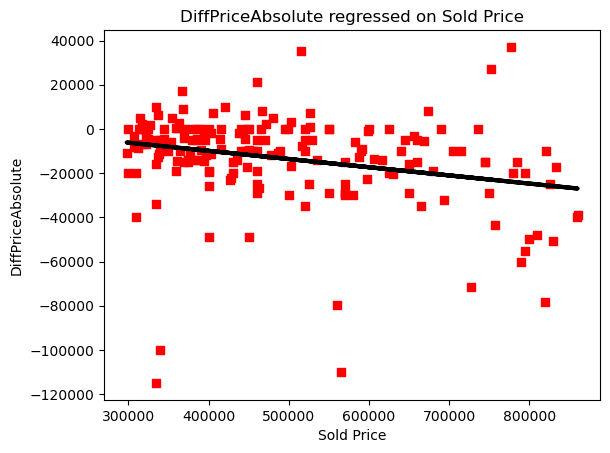

In [101]:
# calculate the regression using DiffPriceAbsolute and SoldPrice
data_ols = sm.ols(formula="DiffPriceAbsolute ~ SoldPrice", data=data_final).fit()
print(data_ols.summary())

# plot the original data
plt.scatter(x=data_final['SoldPrice'],y=data_final['DiffPriceAbsolute'],c='r',marker='s')
# plot the predicted model
plt.plot(data_final['SoldPrice'],data_ols.predict(),c='black',linewidth=3)
plt.xlabel("Sold Price")
plt.ylabel("DiffPriceAbsolute")
plt.title("DiffPriceAbsolute regressed on Sold Price")
plt.show()

                            OLS Regression Results                            
Dep. Variable:      DiffPriceRelative   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                    0.4718
Date:                Fri, 24 Feb 2023   Prob (F-statistic):              0.493
Time:                        15:13:30   Log-Likelihood:                 342.46
No. Observations:                 185   AIC:                            -680.9
Df Residuals:                     183   BIC:                            -674.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9820      0.010    101.920      0.0

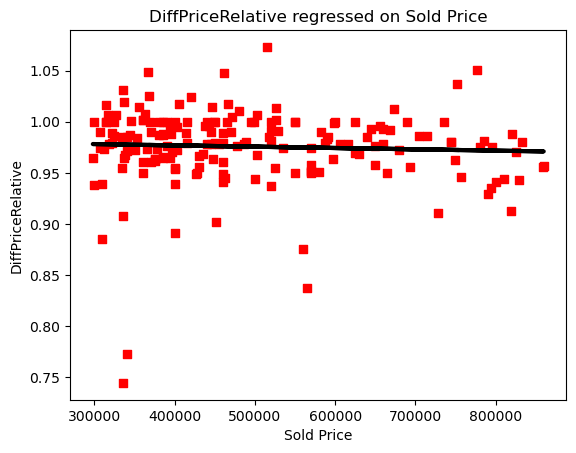

In [102]:
# calculate the regression using Sold price and DiffPriceRelative
data_ols = sm.ols(formula="DiffPriceRelative ~ SoldPrice", data=data_final).fit()
print(data_ols.summary())

# plot the original data
plt.scatter(x=data_final['SoldPrice'],y=data_final['DiffPriceRelative'],c='r',marker='s')
# plot the predicted model
plt.plot(data_final['SoldPrice'],data_ols.predict(),c='black',linewidth=3)
plt.xlabel("Sold Price")
plt.ylabel("DiffPriceRelative")
plt.title("DiffPriceRelative regressed on Sold Price")
plt.show()

**Your Interpretation:** 

Question 1: My model does not achieve as good of an R-squared as the original. My value is 0.747 while the list price model is 0.984.

Question 2: The DiffPriceAbsolute makes a better prediction with an R-squared value of 0.129 compared to the DiffPriceAbsolute which has an R-squared value of 0.047. 

Question 3: We can understand that these models are different because as the price of the house changes to be higher or lower, the relative difference will change also. There may be a more drastic difference between the absolute prices for a higher priced house, but the absolute difference would not reflect the same. On the other side, the absolute difference for a lower priced house may not be as large but the relative difference could reflect a larger change. We can see from the individual regressions containing sold price that the relative difference has a smaller r-squared than the absolute. 

### Task 7: Incorporating a categorical variable

Above, we considered houses, townhouses, and condos together, but here we'll distinguish between them. Consider the two regression models: 
$$
\text{SoldPrice} = \beta_0 + \beta_1 \text{Prop_Type_num}
$$
and 
$$
\text{SoldPrice} = \beta_0  + \beta_1 \text{Prop_Type_num} + \beta_2 \text{TotSqf}
$$
From the first model, it would appear that Property type is significant in predicting the sold price. On the other hand, the second model indicates that when you take into account total square footage, property type is no longer predictive. Explain this. (Hint: there is a confounder lurking here.) Make a scatterplot of TotSqf vs. SoldPrice where the house types are colored differently to illustrate your explanation. 

In [103]:
# Your code goes here

# calculate the regression using Sold price and Prop_Type_num
data_ols = sm.ols(formula="SoldPrice ~ Prop_Type_num", data=data_final).fit()
print(data_ols.summary())

# calculate the regression Sold price, Prop_Type_num, and Total Square Feet
data_ols = sm.ols(formula="SoldPrice ~ Prop_Type_num + TotSqf", data=data_final).fit()
print(data_ols.summary())

                            OLS Regression Results                            
Dep. Variable:              SoldPrice   R-squared:                       0.035
Model:                            OLS   Adj. R-squared:                  0.030
Method:                 Least Squares   F-statistic:                     6.642
Date:                Fri, 24 Feb 2023   Prob (F-statistic):             0.0107
Time:                        15:13:37   Log-Likelihood:                -2464.8
No. Observations:                 185   AIC:                             4934.
Df Residuals:                     183   BIC:                             4940.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      5.058e+05   1.19e+04     42.622

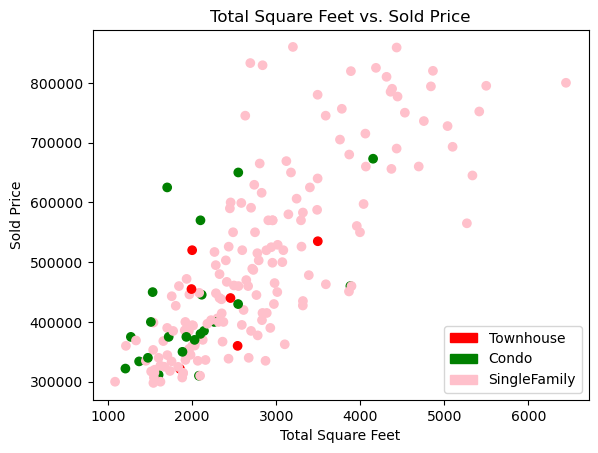

In [105]:
# create a color list mapping the property type to the corresponding color
color_list=data_final["PropType"].map({"Condo":"green", "Townhouse":"red", "Single Family":"pink"})

# import this library to help with the legend
import matplotlib.patches as mpatches

# create the plots
fig,ax = plt.subplots()
ax.scatter(x = "TotSqf", y = "SoldPrice", c = color_list, data = data_final)
# label the axes and give it a title
ax.set_xlabel("Total Square Feet")
ax.set_ylabel("Sold Price")
ax.set_title("Total Square Feet vs. Sold Price")
# set the labels to be included in the legend
red_patch = mpatches.Patch(color = "red",label = "Townhouse")
green_patch = mpatches.Patch(color = "green",label = "Condo")
pink_patch = mpatches.Patch(color = "pink",label = "SingleFamily")
# create the legend using the colors and titles and give it a location
ax.legend(handles=[red_patch,green_patch,pink_patch],loc="lower right")
plt.show()

**Your Interpretation:** It would make sense that after you include total square feet that the property type becomes insignificant because the two are likely correlated. If you live in a Townhouse or Condo the square footage is likely smaller than that of a Single family home. In addition, this correlates with the sold price. Because the property type and square footage are essentially describing a similar metric, they are providing the same trends to predict the sold price off of. 